In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [107]:
fieldOfStudy= pd.read_csv("Most-Recent-Cohorts-Field-of-Study.csv")

In [108]:
def filter_out_value(df, columns, value="PS"):
    for col in columns:
        df = df [df[col] != value]
    return df


In [109]:
filtered_df_earnings = filter_out_value(fieldOfStudy, ["EARN_MDN_5YR"])
filtered_df_earnings_male = filter_out_value(fieldOfStudy, ['EARN_MALE_WNE_MDN_5YR']) 
filtered_df_earnings_non_male = filter_out_value(fieldOfStudy, ['EARN_NOMALE_WNE_MDN_5YR']) 
filtered_df_earnings_generic_male_non_male = filter_out_value(fieldOfStudy, ['EARN_NOMALE_WNE_MDN_5YR','EARN_MALE_WNE_MDN_5YR',"EARN_MDN_5YR"]) 


In [110]:
filtered_df_earnings.to_csv("filtered_df_earnings.csv")
filtered_df_earnings_male.to_csv("filtered_df_earnings_male.csv")
filtered_df_earnings_non_male.to_csv("filtered_df_earnings_non_male.csv")
filtered_df_earnings_generic_male_non_male.to_csv("filtered_df_earnings_generic_male_non_male.csv")

In [111]:
columnstokeep = ['INSTNM','CONTROL','CIPDESC','CREDDESC','EARN_MDN_5YR','EARN_MALE_WNE_MDN_5YR','EARN_NOMALE_WNE_MDN_5YR']
filtered_times_2_df_earnings_generic_male_non_male = filtered_df_earnings_generic_male_non_male[columnstokeep]



In [112]:
filtered_times_2_df_earnings_generic_male_non_male = filtered_times_2_df_earnings_generic_male_non_male.rename(columns={'INSTNM':'College',
                                            'CONTROL':'Funding Status',
                                            'CIPDESC':'Field Of Study',
                                            'CREDDESC':'Degree',
                                            'EARN_MDN_5YR':'5 Year Earnings',
                                            'EARN_MALE_WNE_MDN_5YR':'5 Year Earnings for Males',
                                            'EARN_NOMALE_WNE_MDN_5YR':'5 Year Earnings for Non-Males'})

In [113]:
filtered_times_2_df_earnings_generic_male_non_male=filtered_times_2_df_earnings_generic_male_non_male.reset_index(drop=True)



In [114]:
filtered_times_2_df_earnings_generic_male_non_male.to_csv('filtered_times_2_df_earnings_generic_male_non_male.csv')

In [115]:
def dashfunction (value):
    if ' - ' not in value:
        value = value.split('-')[0]
    return(value)


In [116]:
final_df_earnings_generic_male_non_male = filtered_times_2_df_earnings_generic_male_non_male
#final_df_earnings_generic_male_non_male['College'] = final_df_earnings_generic_male_non_male['College'].apply(dashfunction)
#final_df_earnings_generic_male_non_male.groupby('College', as_index=False)

In [117]:
final_df_earnings_generic_male_non_male['5 Year Earnings']=final_df_earnings_generic_male_non_male['5 Year Earnings'].astype(int)
final_df_earnings_generic_male_non_male['5 Year Earnings for Males']=final_df_earnings_generic_male_non_male['5 Year Earnings for Males'].astype(int)
final_df_earnings_generic_male_non_male['5 Year Earnings for Non-Males']=final_df_earnings_generic_male_non_male['5 Year Earnings for Non-Males'].astype(int)

In [118]:
final_df_earnings_generic_male_non_male_field_of_study_pivot_table =  pd.pivot_table(final_df_earnings_generic_male_non_male,index=['Field Of Study'],values=['5 Year Earnings','5 Year Earnings for Males','5 Year Earnings for Non-Males'],aggfunc='mean').round(1)
final_df_earnings_generic_male_non_male_college_pivot_table =  pd.pivot_table(final_df_earnings_generic_male_non_male,index=['College'],values=['5 Year Earnings','5 Year Earnings for Males','5 Year Earnings for Non-Males'],aggfunc='mean').round(1)

In [119]:
final_df_earnings_generic_male_non_male_field_of_study_pivot_table

,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
Field Of Study,,,
Accounting and Related Services.,75825.3,78338.1,73703.4
Advanced/Graduate Dentistry and Oral Sciences.,226712.2,260213.0,199214.2
"Aerospace, Aeronautical and Astronautical Engineering.",100364.7,98738.0,102052.8
Agricultural Business and Management.,68327.9,72276.7,61507.6
Agricultural Engineering.,89321.7,89274.7,91002.0
...,...,...,...
Veterinary/Animal Health Technologies/Technicians.,37302.8,37851.1,37156.2
"Visual and Performing Arts, General.",45258.3,45716.4,45309.8
"Visual and Performing Arts, Other.",53866.2,67340.2,47765.8


In [120]:
final_df_earnings_generic_male_non_male_college_pivot_table

,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
College,,,
A - Technical College,26061.0,36794.0,24881.0
A T Still University of Health Sciences,134607.4,145785.4,131147.2
AI Miami International University of Art and Design,38762.1,41424.4,37744.1
ASA College,33693.7,35423.0,32418.0
Abington Memorial Hospital Dixon School of Nursing,87847.0,90774.0,87019.0
...,...,...,...
Yeshiva University,113941.3,106147.3,119155.3
York College of Pennsylvania,60793.5,74047.0,54412.0
York Technical College,41516.0,48729.0,38838.0


In [121]:
fieldofstudybottom20earnings = final_df_earnings_generic_male_non_male_field_of_study_pivot_table.sort_values(by='5 Year Earnings', axis=0, ascending=True).head(20)
fieldofstudybottom20earnings

,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
Field Of Study,,,
Cosmetology and Related Personal Grooming Services.,21067.8,22873.7,20882.6
Agriculture/Veterinary Preparatory Programs.,21333.0,20373.0,21595.0
Basic Skills and Developmental/Remedial Education.,23707.3,34462.7,20884.7
"Personal and Culinary Services, Other.",24047.0,26655.0,23280.0
Somatic Bodywork and Related Therapeutic Services.,24334.4,28935.8,22969.6
Health-Related Knowledge and Skills.,24454.0,26915.0,23643.0
Movement and Mind-Body Therapies and Education.,25811.0,17897.0,27257.0
Dance.,28494.0,30221.0,27364.0
Carpenters.,29993.0,23673.0,43756.0


In [152]:
fieldofstudytop20yearearnings = final_df_earnings_generic_male_non_male_field_of_study_pivot_table.sort_values(by='5 Year Earnings', axis=0, ascending=False).head(20)
fieldofstudytop20yearearnings.to_csv("fieldofstudytop20yearearnings.csv")
fieldofstudytop20yearearnings


,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
Field Of Study,,,
Advanced/Graduate Dentistry and Oral Sciences.,226712.2,260213.0,199214.2
Medicine.,164162.6,162328.1,165626.8
Dentistry.,158790.1,170877.4,148354.7
Operations Research.,151071.0,139491.0,166876.0
Systems Engineering.,148980.8,151642.4,143988.8
Computer Science.,143629.8,142952.6,140674.6
Medical Clinical Sciences/Graduate Medical Studies.,140546.0,151155.0,121246.0
"Pharmacy, Pharmaceutical Sciences, and Administration.",139183.5,144650.5,136674.9
Real Estate.,132057.3,139047.7,122787.7


In [123]:
count_data = filtered_times_2_df_earnings_generic_male_non_male['Field Of Study'].value_counts().reset_index()


In [151]:
top20countfieldofstudy = count_data.head(20)
top20countfieldofstudy.to_csv("top20countfieldofstudy.csv")
top20countfieldofstudy


,Field Of Study,count
0,"Business Administration, Management and Operat...",1687
1,"Liberal Arts and Sciences, General Studies and...",947
2,Criminal Justice and Corrections.,777
3,Accounting and Related Services.,690
4,"Registered Nursing, Nursing Administration, Nu...",681
5,Allied Health and Medical Assisting Services.,547
6,"Psychology, General.",414
7,"Biology, General.",378
8,"Allied Health Diagnostic, Intervention, and Tr...",368
9,Communication and Media Studies.,353


In [125]:
bottom20countfieldofstudy = count_data.tail(40)
bottom20countfieldofstudy

,Field Of Study,count
226,"Theology and Religious Vocations, Other.",2
227,"Natural Resources and Conservation, Other.",1
228,Family and Consumer Sciences/Human Sciences Bu...,1
229,Mechanical Engineering Related Technologies/Te...,1
230,Applied Horticulture and Horticultural Busines...,1
231,Construction Engineering Technologies.,1
232,Communication Disorders Sciences and Services.,1
233,Mining and Mineral Engineering.,1
234,Radiology Residency/Fellowship Programs.,1
235,Movement and Mind-Body Therapies and Education.,1


In [126]:
count_data_funding_status = filtered_times_2_df_earnings_generic_male_non_male['Funding Status'].value_counts().reset_index()
count_data_funding_status

,Funding Status,count
0,Public,9072
1,"Private, nonprofit",3819
2,"Private, for-profit",3290
3,Foreign,11


In [127]:
groupbyfundingstatus = filtered_times_2_df_earnings_generic_male_non_male.groupby('Funding Status')['5 Year Earnings'].mean().round()
groupbyfundingstatus

Funding Status
Foreign                138419.0
Private, for-profit     47416.0
Private, nonprofit      78586.0
Public                  65207.0
Name: 5 Year Earnings, dtype: float64

In [128]:
fieldofstudytop20yearearnings.to_csv('fieldofstudytop20yearearnings.csv')
fieldofstudytop20yearearnings = pd.read_csv('fieldofstudytop20yearearnings.csv')


In [129]:
fieldofstudybottom20earnings.to_csv('fieldofstudybottom20earnings.csv')
fieldofstudybottom20earnings = pd.read_csv('fieldofstudybottom20earnings.csv')


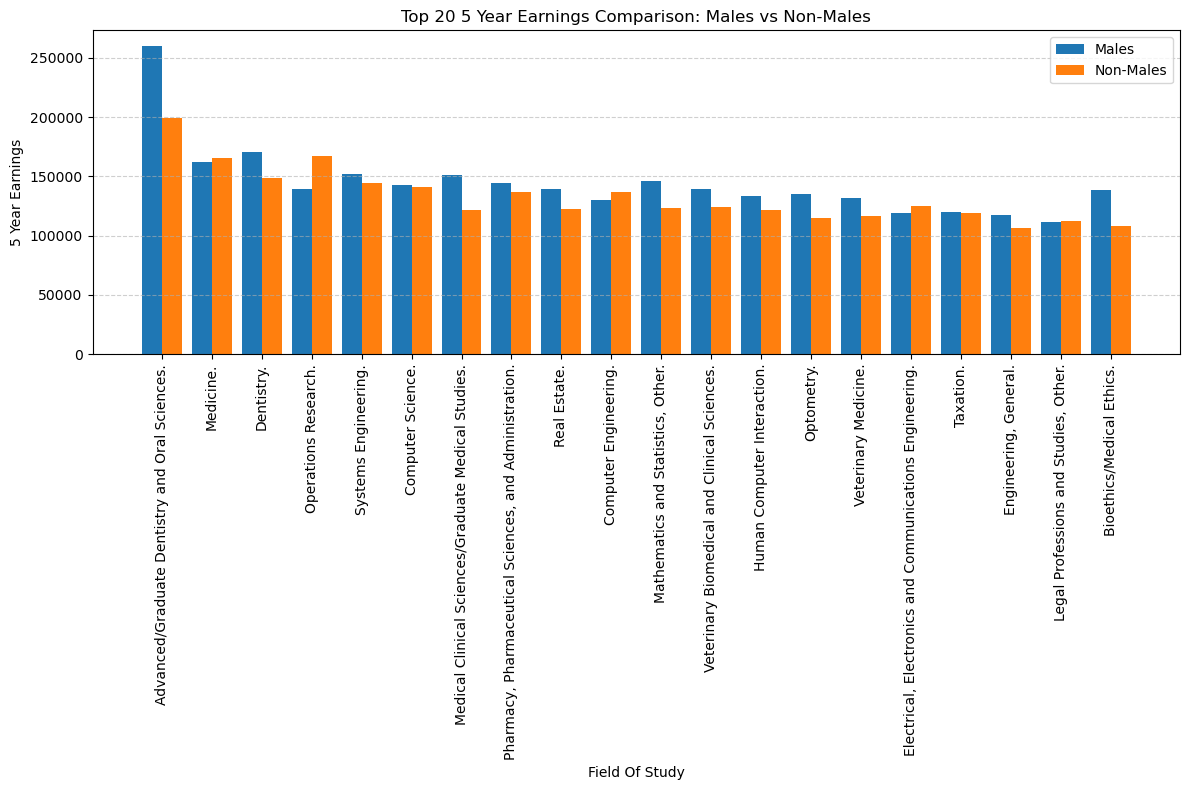

In [136]:
plt.figure(figsize=(12, 8))
x = range(len(fieldofstudytop20yearearnings['Field Of Study']))

# Plot bars for males and non-males
plt.bar(x, fieldofstudytop20yearearnings['5 Year Earnings for Males'], width=0.4, label='Males', align='center')
plt.bar([i + 0.4 for i in x], fieldofstudytop20yearearnings['5 Year Earnings for Non-Males'], width=0.4, label='Non-Males', align='center')

# Set the labels and title
plt.xticks([i + 0.2 for i in x], fieldofstudytop20yearearnings['Field Of Study'], rotation=90)
plt.xlabel('Field Of Study')
plt.ylabel('5 Year Earnings')
plt.title('Top 20 5 Year Earnings Comparison: Males vs Non-Males')
plt.legend()

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

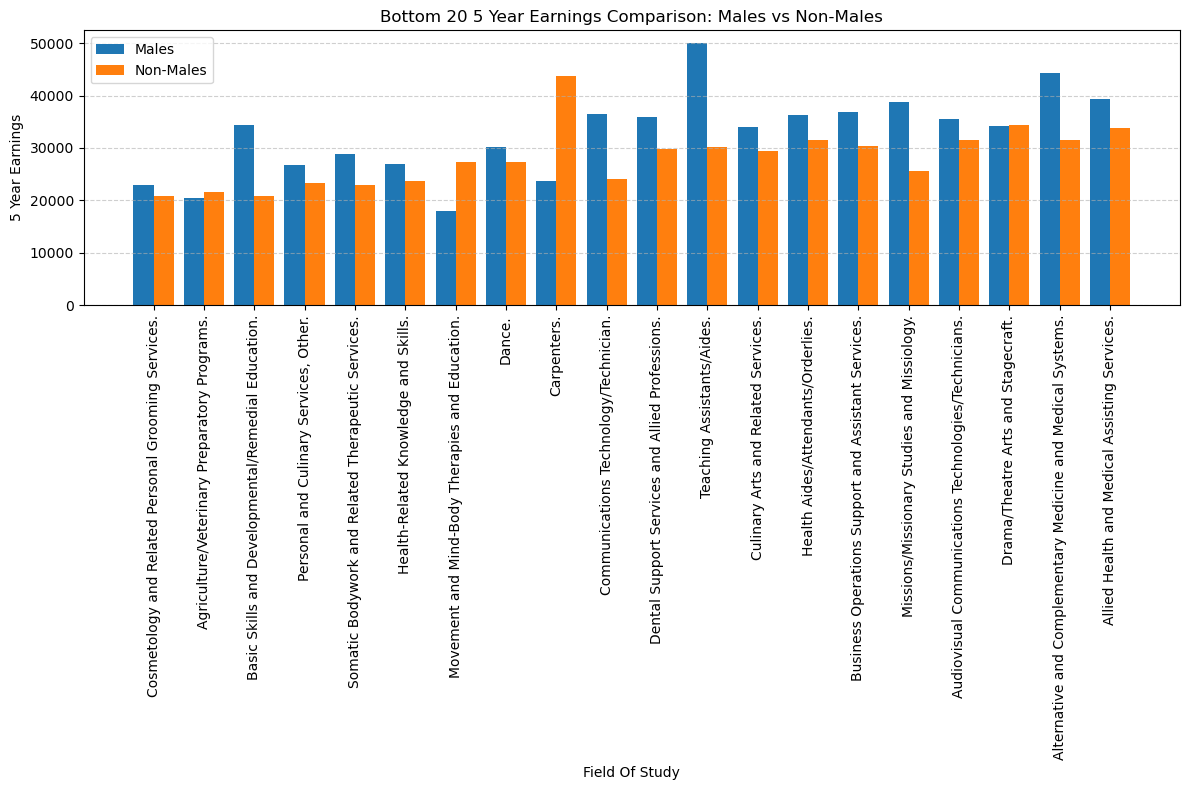

In [137]:
plt.figure(figsize=(12, 8))
x = range(len(fieldofstudybottom20earnings['Field Of Study']))

# Plot bars for males and non-males
plt.bar(x, fieldofstudybottom20earnings['5 Year Earnings for Males'], width=0.4, label='Males', align='center')
plt.bar([i + 0.4 for i in x], fieldofstudybottom20earnings['5 Year Earnings for Non-Males'], width=0.4, label='Non-Males', align='center')

# Set the labels and title
plt.xticks([i + 0.2 for i in x], fieldofstudybottom20earnings['Field Of Study'], rotation=90)
plt.xlabel('Field Of Study')
plt.ylabel('5 Year Earnings')
plt.title('Bottom 20 5 Year Earnings Comparison: Males vs Non-Males')
plt.legend()

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

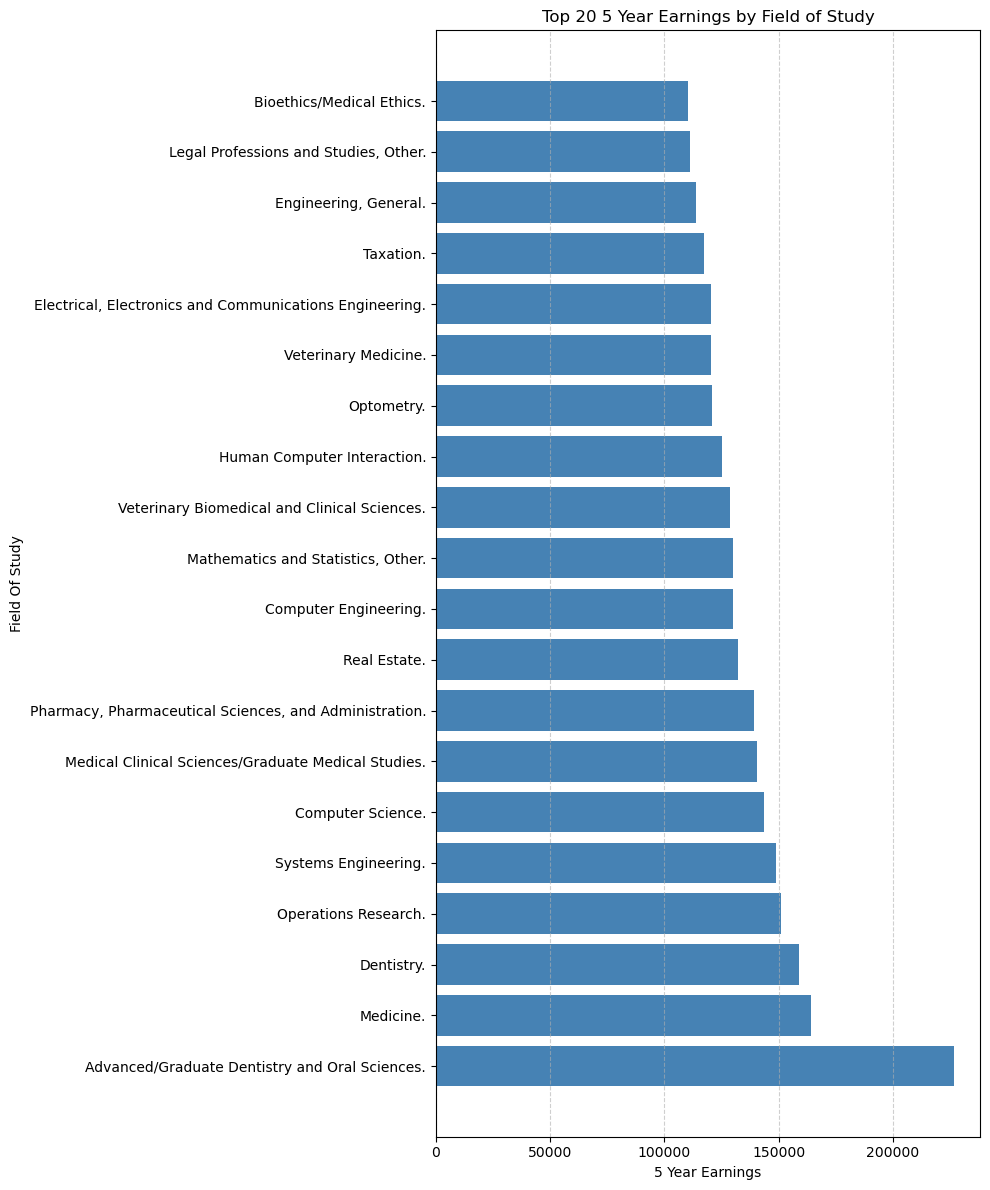

In [138]:
# Set up the plot
plt.figure(figsize=(10, 12))

# Plot horizontal bars for 5 Year Earnings
plt.barh(fieldofstudytop20yearearnings['Field Of Study'], fieldofstudytop20yearearnings['5 Year Earnings'], color='steelblue')

# Set the labels and title
plt.xlabel('5 Year Earnings')
plt.ylabel('Field Of Study')
plt.title('Top 20 5 Year Earnings by Field of Study')

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout to fit labels properly
plt.tight_layout()

# Show the plot
plt.show()

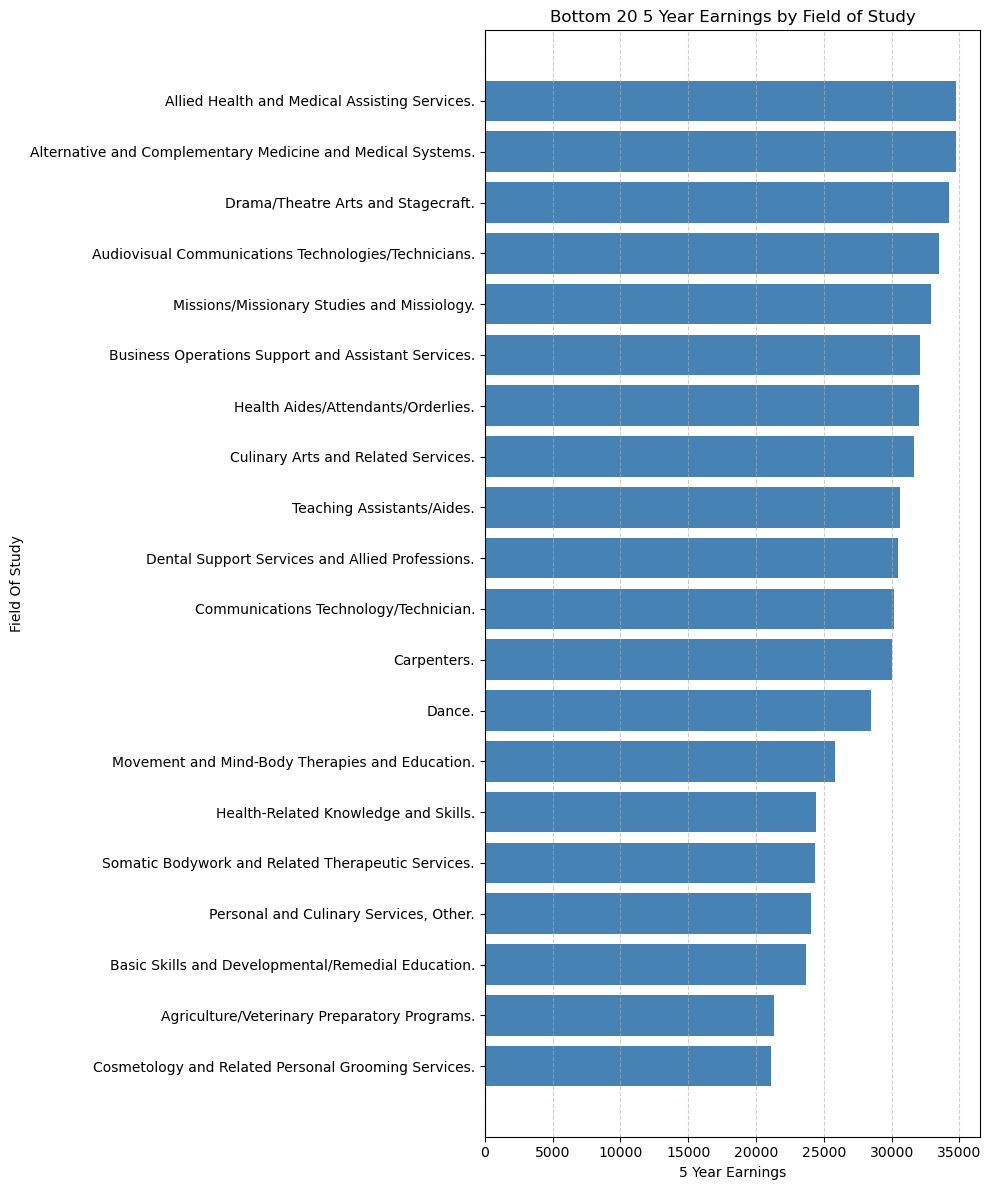

In [139]:
# Set up the plot
plt.figure(figsize=(10, 12))

# Plot horizontal bars for 5 Year Earnings
plt.barh(fieldofstudybottom20earnings['Field Of Study'], fieldofstudybottom20earnings['5 Year Earnings'], color='steelblue')

# Set the labels and title
plt.xlabel('5 Year Earnings')
plt.ylabel('Field Of Study')
plt.title('Bottom 20 5 Year Earnings by Field of Study')

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout to fit labels properly
plt.tight_layout()

# Show the plot
plt.show()

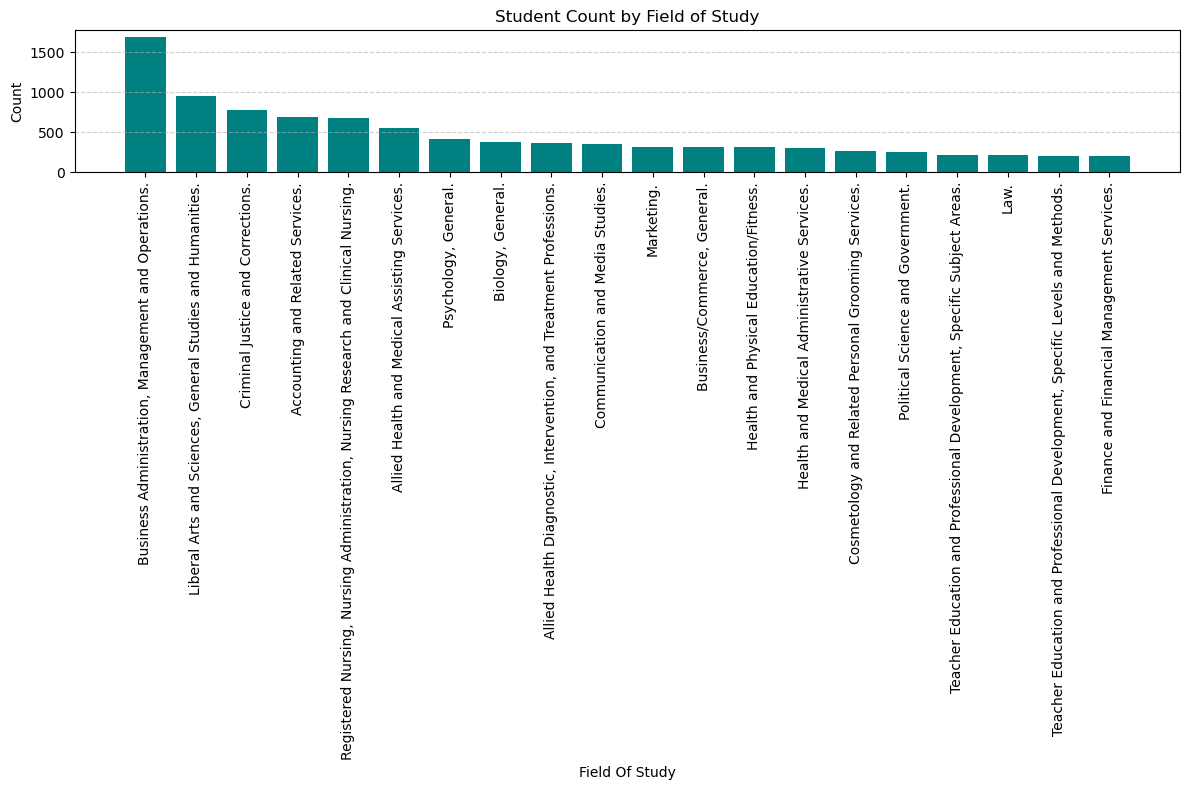

In [135]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot vertical bars
plt.bar(top20countfieldofstudy['Field Of Study'], top20countfieldofstudy['count'], color='teal')

# Set the labels and title
plt.xlabel('Field Of Study')
plt.ylabel('Count')
plt.title('Student Count by Field of Study')
plt.xticks(rotation=90)

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


In [166]:
final_df_earnings_generic_male_non_male_field_of_study_pivot_table.to_csv('final_df_earnings_generic_male_non_male_field_of_study_pivot_table.csv')
final_df_earnings_generic_male_non_male_field_of_study_pivot_table=pd.read_csv('final_df_earnings_generic_male_non_male_field_of_study_pivot_table.csv')

In [168]:
mergeddataset = pd.merge(count_data,final_df_earnings_generic_male_non_male_field_of_study_pivot_table , on='Field Of Study', how='inner')
mergeddataset
m1 = mergeddataset.sort_values(by='5 Year Earnings', axis=0, ascending=False).head(20)
m2 = mergeddataset.sort_values(by='count', axis=0, ascending=False).head(20)

In [170]:
m2

,Field Of Study,count,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
0,"Business Administration, Management and Operat...",1687,73762.1,80087.1,68797.9
1,"Liberal Arts and Sciences, General Studies and...",947,43559.5,48259.7,41305.7
2,Criminal Justice and Corrections.,777,49640.5,56926.1,43875.3
3,Accounting and Related Services.,690,75825.3,78338.1,73703.4
4,"Registered Nursing, Nursing Administration, Nu...",681,89349.3,102529.9,87115.4
5,Allied Health and Medical Assisting Services.,547,34774.1,39413.5,33823.9
6,"Psychology, General.",414,50418.7,52556.9,49782.6
7,"Biology, General.",378,62352.4,64284.1,61157.7
8,"Allied Health Diagnostic, Intervention, and Tr...",368,72558.9,80607.5,68275.6
9,Communication and Media Studies.,353,55769.9,56175.9,55451.1


In [169]:
m1

,Field Of Study,count,5 Year Earnings,5 Year Earnings for Males,5 Year Earnings for Non-Males
172,Advanced/Graduate Dentistry and Oral Sciences.,4,226712.2,260213.0,199214.2
27,Medicine.,156,164162.6,162328.1,165626.8
55,Dentistry.,64,158790.1,170877.4,148354.7
246,Operations Research.,1,151071.0,139491.0,166876.0
167,Systems Engineering.,5,148980.8,151642.4,143988.8
77,Computer Science.,31,143629.8,142952.6,140674.6
216,Medical Clinical Sciences/Graduate Medical Stu...,2,140546.0,151155.0,121246.0
28,"Pharmacy, Pharmaceutical Sciences, and Adminis...",146,139183.5,144650.5,136674.9
199,Real Estate.,3,132057.3,139047.7,122787.7
189,Computer Engineering.,3,130078.3,129672.0,137098.7


In [173]:
m1.to_csv('m1.csv')
m2.to_csv('m2.csv')

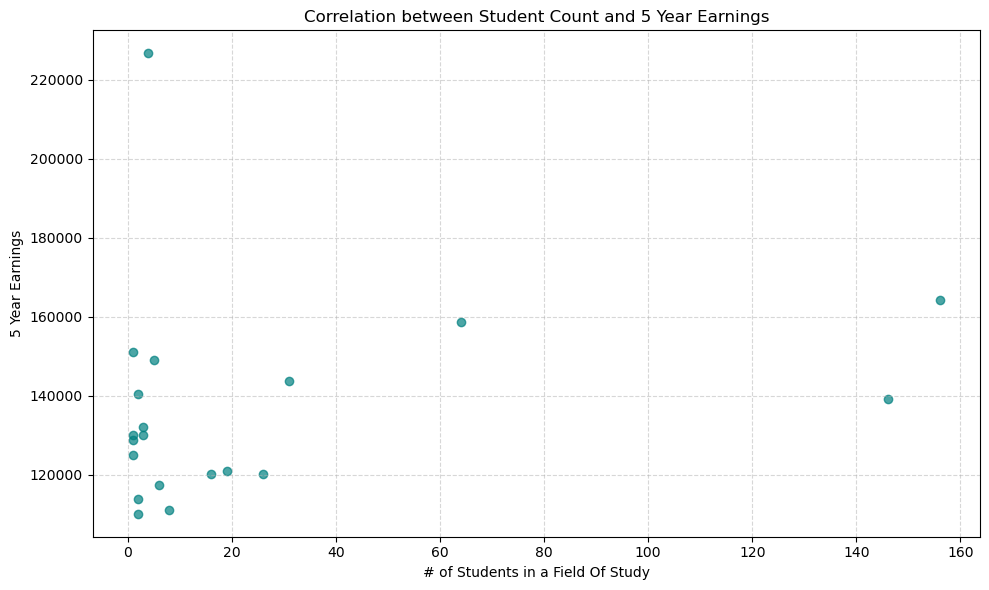

In [ ]:

# Scatter plot: Count vs. 5 Year Earnings
plt.figure(figsize=(10, 6))
plt.scatter(m1['count'], m1['5 Year Earnings'], color='teal', alpha=0.7)

# Add labels and title
plt.xlabel('# of Students in a Field Of Study')
plt.ylabel('5 Year Earnings')
plt.title('Correlation between Student Count and 5 Year Earnings')

# Add a grid for readability
plt.grid(alpha=0.5, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()


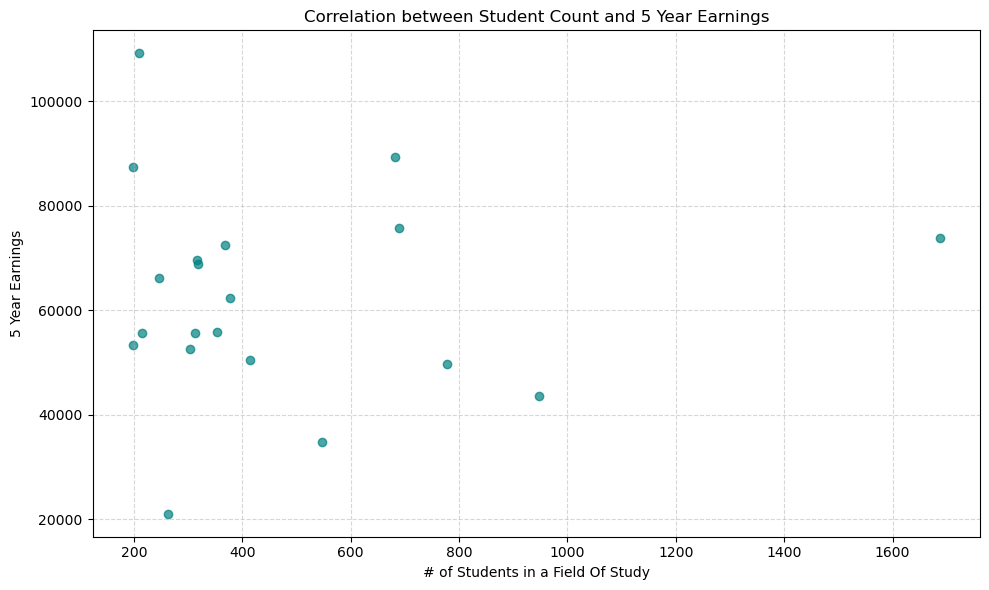

In [172]:
# Scatter plot: Count vs. 5 Year Earnings
plt.figure(figsize=(10, 6))
plt.scatter(m2['count'], m2['5 Year Earnings'], color='teal', alpha=0.7)

# Add labels and title
plt.xlabel('# of Students in a Field Of Study')
plt.ylabel('5 Year Earnings')
plt.title('Correlation between Student Count and 5 Year Earnings')

# Add a grid for readability
plt.grid(alpha=0.5, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()